In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
original_data = pd.read_csv('./Data_clean')
original_data.head(5)

,Unnamed: 0,N_factura,ID_Cliente,País,Cantidad,Monto,Fecha,Continente,Mes,Dia,Año,Periodo,Out_kingdom,Volumen_cantidad
0,0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Europa,Marzo,30,2021,2021 03,0,100<=x<=200
1,1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Europa,Noviembre,11,2021,2021 11,0,100<=x<=200
2,3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Europa,Abril,6,2021,2021 04,0,x<50
3,4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Europa,Octubre,27,2021,2021 10,0,300<=x<=400
4,5,576630,13816.0,Germany,91,199.98,2021-11-16 08:38:00,Europa,Noviembre,16,2021,2021 11,1,50<=x<=100


In [3]:
data = original_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18562 entries, 0 to 18561
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18562 non-null  int64  
 1   N_factura         18562 non-null  int64  
 2   ID_Cliente        18562 non-null  float64
 3   País              18562 non-null  object 
 4   Cantidad          18562 non-null  int64  
 5   Monto             18562 non-null  float64
 6   Fecha             18562 non-null  object 
 7   Continente        18554 non-null  object 
 8   Mes               18562 non-null  object 
 9   Dia               18562 non-null  int64  
 10  Año               18562 non-null  int64  
 11  Periodo           18562 non-null  object 
 12  Out_kingdom       18562 non-null  int64  
 13  Volumen_cantidad  18562 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.0+ MB


## 1) ¿Cuanto se vende en promedio por mes?

- **Esto lo puedo mejorar creando diccionarios donde el la llave sea el periodo y el valor el  promedio**

In [93]:
# creare un array que guarde los periodos de venta    
periodos = data['Periodo'].value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# la funcion calcula el promedio vendido dependiendo del periodo mediante una logica
def calcular_promedio_periodo(lista):

    promedio_periodo = []
    
    for i in lista_periodos:
        # este array es una pequeña tabla donde solo tienen los datos que corresponden con i
        array = lista[lista['Periodo'] == i]
        valor_promedio_periodo = array['Monto'].mean()
        
        promedio_periodo.append(valor_promedio_periodo)
        
    return(promedio_periodo)

promedio_periodos = calcular_promedio_periodo(data)

# organizaremos en nivel ascendente los periodos
indices_periodos = np.argsort(lista_periodos)
# crearemos lista que sigan este orden para no perder la relacion
periodos = [lista_periodos[i] for i in indices_periodos]
promedio = [promedio_periodos[i] for i in indices_periodos]

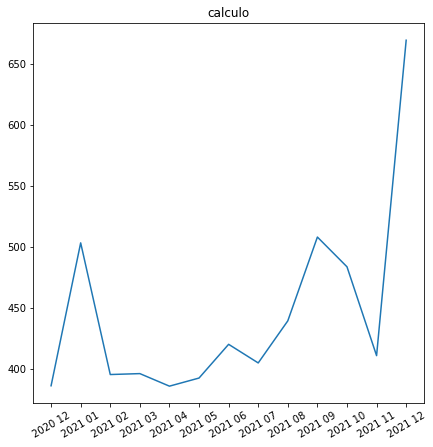

In [135]:
fig, ax = plt.subplots( figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.lineplot(x=periodos, y=promedio)
ax.set_title('calculo')
ax.tick_params(axis='x', rotation=30);
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.show()


## 1.1) Cuanto se vende en promedio por mes FUERA de reino unido

In [136]:
# separo un dataframe con ventas fuera de reino unido
Out_kingdom = data[data['Out_kingdom'] == 1]

# creo una lista de los periodos de venta
periodos = out_kingdom.Periodo.value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# funcion que calcula el promedio dependiendo de el periodo 
def calcular_promedio(lista):
    promedio_periodo = []
    
    for i in lista_periodos:
        minidf = lista[lista['Periodo'] == i]
        promedio = minidf.Monto.mean()
        promedio_periodo.append(promedio)
        
    return(promedio_periodo)

lista_promedio = calcular_promedio(Out_kingdom)

# organizare el periodo en orden
indices_periodo = np.argsort(lista_periodos)
# organizo las lista en orden ascendente de los periodos
periodos = [lista_periodos[i] for i in indices_periodo]
promedio = [lista_promedio[i] for i in indices_periodo]

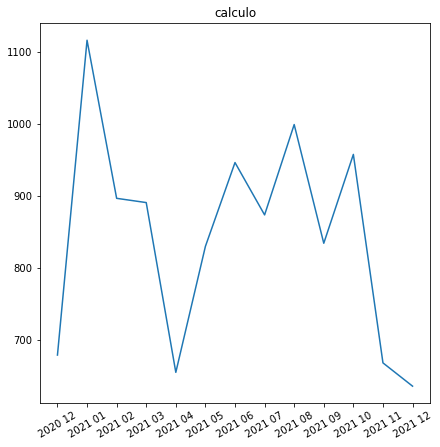

In [139]:
fig, ax = plt.subplots( figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.lineplot(x=periodos, y=promedio)
ax.set_title('calculo')
ax.tick_params(axis='x', rotation=30);

## 1.2) Cuanto se vende en promedio por mes DENTRO de reino unido

In [107]:
# separo un dataframe con ventas fuera de reino unido
Out_kingdom = data[data['Out_kingdom'] == 0]

# creo una lista de los periodos de venta
periodos = out_kingdom.Periodo.value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# funcion que calcula el promedio dependiendo de el periodo 
def calcular_promedio(lista):
    promedio_periodo = []
    
    for i in lista_periodos:
        minidf = lista[lista['Periodo'] == i]
        promedio = minidf.Monto.mean()
        promedio_periodo.append(promedio)
        
    return(promedio_periodo)

lista_promedio = calcular_promedio(Out_kingdom)

# organizare el periodo en orden
indices_periodo = np.argsort(lista_periodos)
# organizo las lista en orden ascendente de los periodos
periodos = [lista_periodos[i] for i in indices_periodo]
promedio = [lista_promedio[i] for i in indices_periodo]

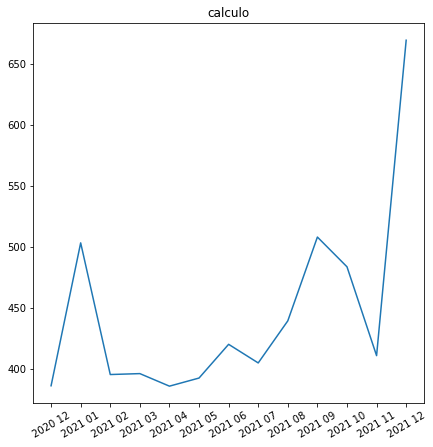

In [134]:
fig, ax = plt.subplots( figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.lineplot(x=periodos, y=promedio)
ax.set_title('calculo')
ax.tick_params(axis='x', rotation=30);
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.show()

## 2) ¿Cual es el promedio de articulos cada mes?


In [6]:
## creare una funcion que me calcule la cantidad PROMEDIO de articulos dependiendo de la fecha
def calcular_promedio_productos(lista):
    periodo_tabla = data.Periodo.value_counts().reset_index(name='fecha')
    periodo = periodo_tabla['index']
    
    promedio_cantidad_valor = []
    
    for i in periodo:
        tabla_periodo = lista[lista['Periodo'] == i]
        promedio_cantidad = tabla_periodo.Cantidad.mean()
    
        promedio_cantidad_valor.append(promedio_cantidad)
        
    return(promedio_cantidad_valor)

promedio_productos = calcular_promedio_productos(data)

<AxesSubplot:xlabel='index'>

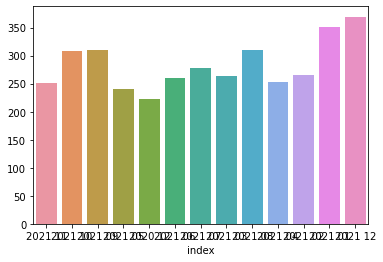

In [7]:
sns.barplot(x=lista_periodos, y=promedio_productos)

# 2.1) cual es el promedio de articulos DENTRO de reino unido


In [131]:
# separo un dataframe con ventas fuera de reino unido
Out_kingdom = data[data['Out_kingdom'] == 0]

# creo una lista de los periodos de venta
periodos = out_kingdom.Periodo.value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# funcion que calcula el promedio dependiendo de el periodo 
def calcular_promedio(lista):
    promedio_cantidad = []
    
    for i in lista_periodos:
        minidf = lista[lista['Periodo'] == i]
        cantidad = minidf.Cantidad.mean()
        promedio_cantidad.append(cantidad)
        
    return(promedio_cantidad)

lista_cantidad = calcular_promedio(Out_kingdom)

# organizare el periodo en orden
indices_periodo = np.argsort(lista_periodos)
# organizo las lista en orden ascendente de los periodos
periodos = [lista_periodos[i] for i in indices_periodo]
cantidad = [lista_cantidad[i] for i in indices_periodo]

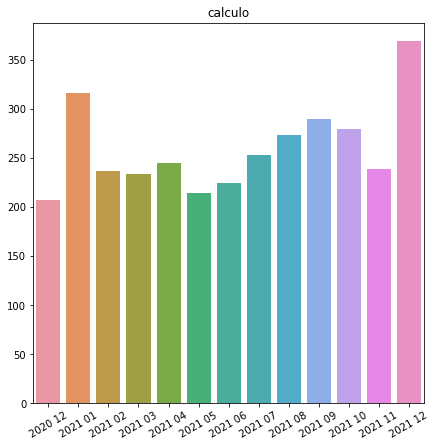

In [114]:
fig, ax = plt.subplots( figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x=periodos, y=cantidad)
ax.set_title('calculo')
ax.tick_params(axis='x', rotation=30);

## 2.2) Cual es el promdio de articulos vendidos FUERA de reino unido


In [115]:
# separo un dataframe con ventas fuera de reino unido
Out_kingdom = data[data['Out_kingdom'] == 1]

# creo una lista de los periodos de venta
periodos = out_kingdom.Periodo.value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# funcion que calcula el promedio dependiendo de el periodo 
def calcular_promedio(lista):
    promedio_cantidad = []
    
    for i in lista_periodos:
        minidf = lista[lista['Periodo'] == i]
        cantidad = minidf.Cantidad.mean()
        promedio_cantidad.append(cantidad)
        
    return(promedio_cantidad)

lista_cantidad = calcular_promedio(Out_kingdom)

# organizare el periodo en orden
indices_periodo = np.argsort(lista_periodos)
# organizo las lista en orden ascendente de los periodos
periodos = [lista_periodos[i] for i in indices_periodo]
cantidad = [lista_cantidad[i] for i in indices_periodo]

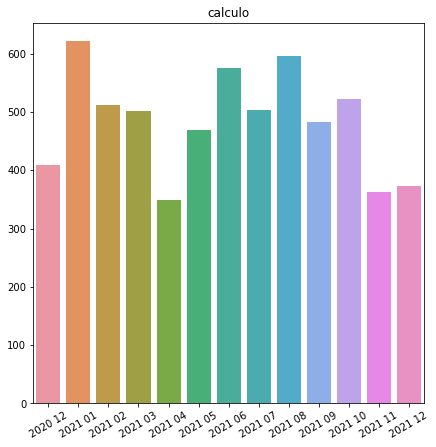

In [116]:
fig, ax = plt.subplots( figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x=periodos, y=cantidad)
ax.set_title('calculo')
ax.tick_params(axis='x', rotation=30);

## 3) cuantas ventas hubo en  durante los periodos ?

In [165]:
## contare la cantidad de facturas emitidas en un periodo seleccionado

# lista de los periodos
lista_periodos = data['Periodo'].value_counts().reset_index(name='cantidad')
lista_periodos = lista_periodos['index']

# funcion que cuneta la cantidad de facturas emitidas en un periodo seleccionado
def cantidad_facturas(data):
    
    lista_cantidad = []
    
    for i in lista_periodos:
        mini_df = data[data['Periodo'] == i]
        cantidad_f = len(mini_df['N_factura'])
        
        lista_cantidad.append(cantidad_f)
    
    return lista_cantidad

lista_cantidad = cantidad_facturas(data)

# organizare de menos a mayor los periodos y guardare sus indices para no perder la relacion con la cantidad de
# facturas

lista_indices = np.argsort(lista_periodos)

periodos = [lista_periodos[i] for i in lista_indices]
cantidad = [lista_cantidad[i] for i in lista_indices]


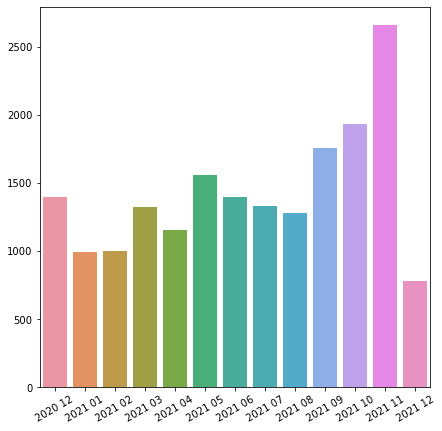

In [166]:
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x=periodos, y=cantidad)
ax.tick_params(axis='x', rotation=30);

## 3.1)cantidad de ventas echas FUERA de reino unido


In [188]:
# separo un dataframe con ventas fuera de reino unido
Out_kingdom = data[data['Out_kingdom'] == 1]

# creo una lista de los periodos de venta
periodos = out_kingdom.Periodo.value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# funcion que calcula el promedio dependiendo de el periodo 
def cantidad_facturas(data):
    
    lista_cantidad = []
    
    for i in lista_periodos:
        mini_df = data[data['Periodo'] == i]
        cantidad_f = len(mini_df['N_factura'])
        
        lista_cantidad.append(cantidad_f)
    
    return lista_cantidad

lista_cantidad = cantidad_facturas(Out_kingdom)

# organizare el periodo en orden
indices_periodo = np.argsort(lista_periodos)
# organizo las lista en orden ascendente de los periodos
periodos = [lista_periodos[i] for i in indices_periodo]
cantidad = [lista_cantidad[i] for i in indices_periodo]

y= sum(cantidad)
print(y)

1889


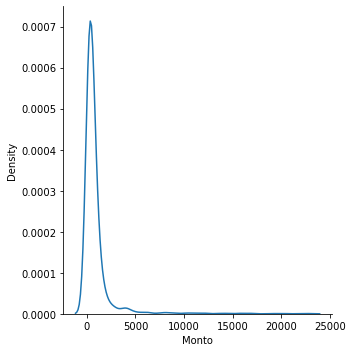

In [196]:
Out_kingdom = data[data['Out_kingdom'] == 1]
sns.displot(data=Out_kingdom, x='Monto', kind='kde', palette='dark')

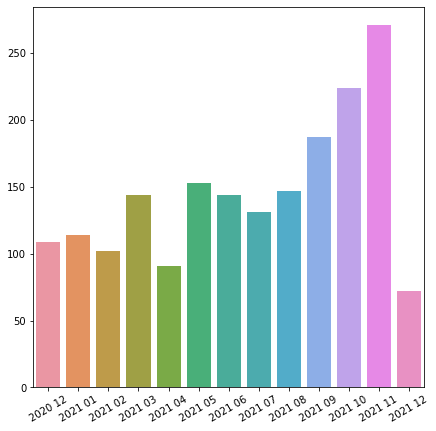

In [189]:
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x=periodos, y=cantidad)
ax.tick_params(axis='x', rotation=30);

## 3.2) cantidad de ventas echas DENTRO de reino unido

In [190]:
# separo un dataframe con ventas dentro de reino unido
Out_kingdom = data[data['Out_kingdom'] == 0]

# creo una lista de los periodos de venta
periodos = out_kingdom.Periodo.value_counts().reset_index(name='cantidad')
lista_periodos = periodos['index']

# funcion que calcula el promedio dependiendo de el periodo 
def cantidad_facturas(data):
    
    lista_cantidad = []
    
    for i in lista_periodos:
        mini_df = data[data['Periodo'] == i]
        cantidad_f = len(mini_df['N_factura'])
        
        lista_cantidad.append(cantidad_f)
    
    return lista_cantidad

lista_cantidad = cantidad_facturas(Out_kingdom)

# organizare el periodo en orden
indices_periodo = np.argsort(lista_periodos)
# organizo las lista en orden ascendente de los periodos
periodos = [lista_periodos[i] for i in indices_periodo]
cantidad = [lista_cantidad[i] for i in indices_periodo]

In [191]:
x= sum(cantidad)
print(x)

16673


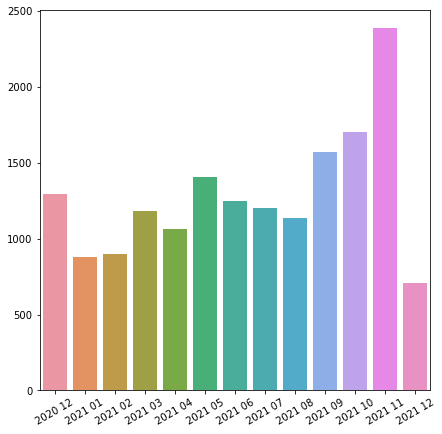

In [192]:
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x=periodos, y=cantidad)
ax.tick_params(axis='x', rotation=30);

18562

In [186]:
data.head(10)

,Unnamed: 0,N_factura,ID_Cliente,País,Cantidad,Monto,Fecha,Continente,Mes,Dia,Año,Periodo,Out_kingdom,Volumen_cantidad
0,0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Europa,Marzo,30,2021,2021 03,0,100<=x<=200
1,1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Europa,Noviembre,11,2021,2021 11,0,100<=x<=200
2,3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Europa,Abril,6,2021,2021 04,0,x<50
3,4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Europa,Octubre,27,2021,2021 10,0,300<=x<=400
4,5,576630,13816.0,Germany,91,199.98,2021-11-16 08:38:00,Europa,Noviembre,16,2021,2021 11,1,50<=x<=100
5,6,538125,18225.0,United Kingdom,16,30.00,2020-12-09 15:46:00,Europa,Diciembre,9,2020,2020 12,0,x<50
6,7,544354,13489.0,United Kingdom,64,77.28,2021-02-18 10:42:00,Europa,Febrero,18,2021,2021 02,0,50<=x<=100
7,8,546369,15513.0,United Kingdom,10,67.50,2021-03-11 11:41:00,Europa,Marzo,11,2021,2021 03,0,x<50
8,9,570651,14911.0,EIRE,86,321.35,2021-10-11 13:34:00,Europa,Octubre,11,2021,2021 10,1,50<=x<=100
9,13,575581,12659.0,France,105,91.68,2021-11-10 11:53:00,Europa,Noviembre,10,2021,2021 11,1,100<=x<=200


## 4) cuanto gasta en promedio un cliente (2021)

- **Valor promedio de compra (VCP).** Se refiere al valor promedio de compra que cada cliente realizan en tu negocio. Se calcula dividiendo el total ingresado durante el último año entre el número de compras realizadas para todos los clientes.

In [9]:
# total de ventas
tabla_2021 = data[data['Año'] > 2020]
ventas = tabla_2021['Monto']
total_ventas = sum(ventas)

# cantidad de clientes
total_compra = tabla_2021.shape[0]

vcp = total_ventas / total_compra
print(vcp)

485.9095629625309


**El promedio de compras de un cliente es de 485.90**

## 5) tasa de frecuencia de compras

-   Tasa de frecuencia de compra (TFC). Se refiere al número de pedidos en en el periodo escogido. Se divide el número total de compras realizadas entre el total de clientes.



In [10]:
## total de compras realizadas
compras_2021 = data[data['Año'] > 2020]
total_compras = compras_2021.shape[0]

## cantidad de clientes
total_clientes = compras_2021['ID_Cliente']
total_clientes = set(total_clientes)

## calcula de TFC
tfc = total_compras / len(total_clientes)

print(tfc)

4.067551552500593


**el numero de pedidos que hace un cliente en el periodo 2021 es de 4.06 pedidos**

## VALOR PROMEDIO DEL CLIENTE // COSTUMMER VALUE

Ahora, multiplica el VPC por el TFC para obtener el Valor Promedio de Cliente o Customer Value (CV) = VCP x TFC

In [11]:
vc = vcp * tfc
print(vc)

1976.462197203127


**El valor promedio de un cliente es de 1976.46**

## ¿Cantidad de articulos vendidos?


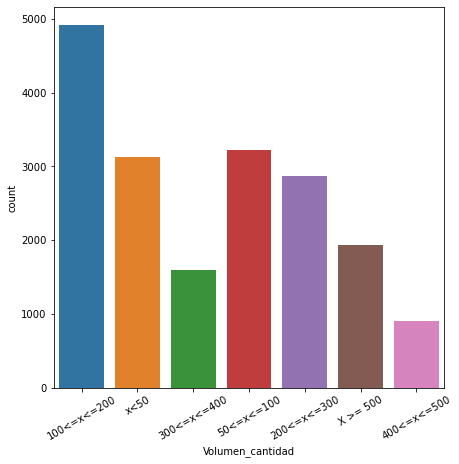

In [197]:
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.countplot(data=data, x='Volumen_cantidad')
ax.tick_params(axis='x', rotation=30);



# promedio de compra por paises

In [205]:

# creo una lista de los periodos de venta
paises = data.País.value_counts().reset_index(name='cantidad')
lista_paises = paises['index']

# funcion que calcula el promedio dependiendo de el periodo 
def promedio_pais(data):
    
    lista_promedio = []
    
    for i in lista_paises:
        mini_df = data[data['País'] == i]
        promedio_pais =  mini_df['Monto'].mean()
        
        lista_promedio.append(promedio_pais)
    
    return(lista_promedio)

lista_promedio = promedio_pais(data)



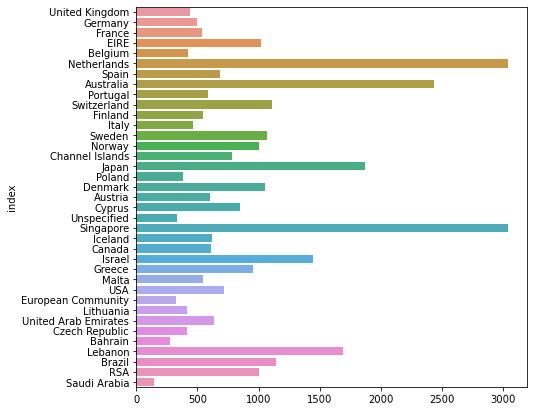

In [209]:
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(y=lista_paises, x=lista_promedio)
ax.tick_params(axis='x', rotation=1);



## calculo de la MEDIANA

In [333]:
from statistics import median

#creo una lista de los paises
paises = data.País.value_counts().reset_index(name='cantidad')
lista_paises = paises['index']

def calculo_mediana(data):
    
    mediana = []
    
    for i in lista_paises:
        
        mini_d = data[data['País'] == i]
        valor=median(mini_d['Monto'])
        
        mediana.append(valor)
    
    return(mediana)
lista_medianas = calculo_mediana(data)   



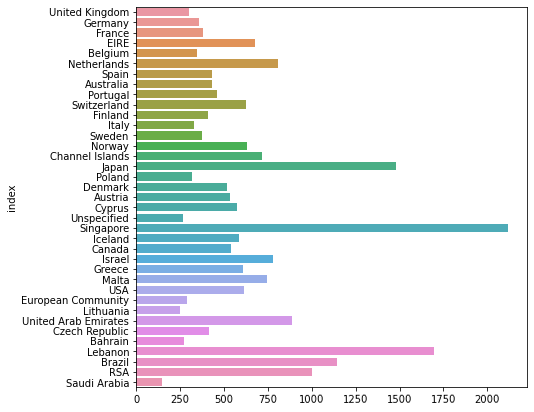

In [335]:
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(hspace=0.5)

sns.barplot(y=lista_paises, x=lista_medianas)
ax.tick_params(axis='x', rotation=1);



In [319]:
#creo una lista de los paises
paises = data.País.value_counts().reset_index(name='cantidad')
lista_paises = paises['index']

# funcion que calcula la media
def calculo_mediana(data):
    
    for i in lista_paises:
        
        mini_d = data[data['País'] == i]
        monto_ordenado = np.sort(mini_d['Monto'])
        mediana = []

        if len(monto_ordenado) % 2 == 0:
            print('es par')

            y = round((len(monto_ordenado)/2))
            z = round(y - 1)
            valor = (mini_d[z] + mini_d[y]) / 2
            mediana.append(valor)

        elif len(monto_ordenado) % 2 != 0:
            print('es inpar')

            y = round(len(monto_ordenado)/2)
            valor = (monto_ordenado[y])
            mediana.append(valor)

    return(mediana)

mediana = calculo_mediana(data)
print(mediana)

es inpar
es inpar
es par


KeyError: 194

In [304]:
# promedio
numeros =[2,3,4,1,5,6,7,8,4,5,7,4,52,3,4,3,35,6,4,6,7,8,9,1,10,34,5,6,7,8,1,2,3,4,5,6,7,8,9,2]
x = len(numeros)
print(x)
y = x/2
print(y)

40
20.0


In [309]:
# funcion que calcula la media
numeros =[2,3,4,1,5,6,7,8,4,5,7,4,52,3,4,3,35,6,4,6,7,8,9,1,10,34,5,6,7,8,1,2,3,4,5,6,7,8,9,9]

def calculo_mediana(data):
    
    x = np.sort(data)
    mediana = []
    
    if len(x) % 2 == 0:
        print('es par')
        
        y = round((len(x)/2))
        valor = (x[y-1] + x[y]) / 2
        mediana.append(valor)
        
    elif len(x) % 2 != 0:
        print('es inpar')
        
        y = round(len(x)/2)
        valor = (x[y])
        mediana.append(valor)
        
    return(mediana)

mediana = calculo_mediana(numeros)
print(len(numeros))
print(mediana)

es par
40
[6.0]


In [220]:
x = len(numeros) % 2
x

1

In [198]:
data.head()

,Unnamed: 0,N_factura,ID_Cliente,País,Cantidad,Monto,Fecha,Continente,Mes,Dia,Año,Periodo,Out_kingdom,Volumen_cantidad
0,0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Europa,Marzo,30,2021,2021 03,0,100<=x<=200
1,1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Europa,Noviembre,11,2021,2021 11,0,100<=x<=200
2,3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Europa,Abril,6,2021,2021 04,0,x<50
3,4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Europa,Octubre,27,2021,2021 10,0,300<=x<=400
4,5,576630,13816.0,Germany,91,199.98,2021-11-16 08:38:00,Europa,Noviembre,16,2021,2021 11,1,50<=x<=100


In [202]:

# creo una lista de los periodos de venta
paises = data.País.value_counts().reset_index(name='cantidad')
lista_paises = paises['index']


,index,cantidad
0,United Kingdom,16673
1,Germany,457
2,France,390
3,EIRE,261
4,Belgium,98
5,Netherlands,94
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


**Casi de 5000 ventas han sido de 100 a 200 articulos**

# Ventas dentro y fuera de reino unido

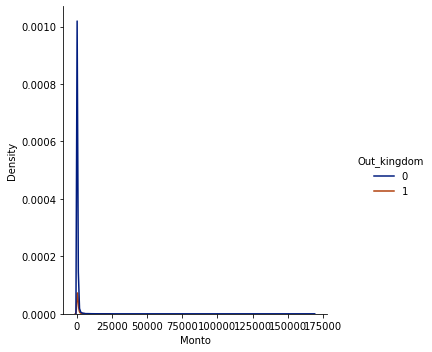

In [6]:
## sns.displot(data=tips, x='total_bill',hue='sex',kind='kde',legend=False,palette='dark',alpha=1)
## plt.show()
sns.displot(data=data, x='Monto', hue='Out_kingdom', kind='kde', palette='dark')

<AxesSubplot:>

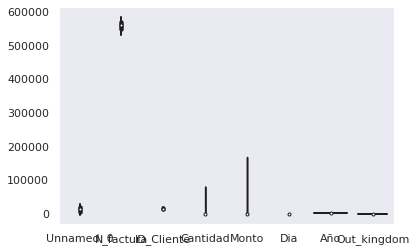

In [49]:
sns.violinplot(data=data)

# coeficiente de correlacion

In [69]:
datos = data['Monto'].value_counts().reset_index(name='cantidad')
## datos = datos[datos['cantidad']>1]
print(datos.sort_values('index'))
## datos mayores que uno
m_uno = datos[datos['cantidad'] > 1]
print(len(m_uno))
print('--'*50)
print(len(datos['cantidad']))

           index  cantidad
5797        0.38         1
12095       0.40         1
8669        0.55         1
1390        0.85         2
274         0.95         3
...          ...       ...
6278    22775.93         1
8134    31698.16         1
5015    38970.00         1
3548    77183.60         1
12700  168469.60         1

[14742 rows x 2 columns]
2358
----------------------------------------------------------------------------------------------------
14742


In [ ]:
data.corr()

<AxesSubplot:>

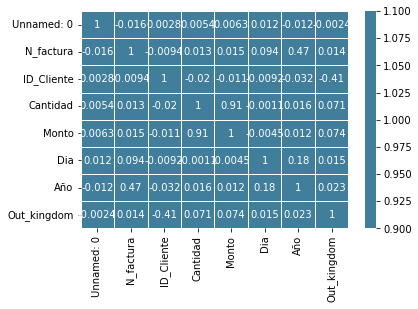

In [20]:
sns.heatmap(
    data=data.corr(),
    center=0,
    vmin=1,
    vmax=1,
    linewidth=0.5,
    annot=True,
    cmap=sns.diverging_palette(200, 230, as_cmap=True)
)

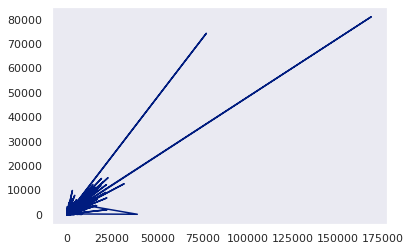

In [30]:
plt.plot(data['Monto'],data['Cantidad'])
plt.show()

(array([1.855e+04, 9.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.80000000e-01, 1.68473020e+04, 3.36942240e+04, 5.05411460e+04,
        6.73880680e+04, 8.42349900e+04, 1.01081912e+05, 1.17928834e+05,
        1.34775756e+05, 1.51622678e+05, 1.68469600e+05]),
 <BarContainer object of 10 artists>)

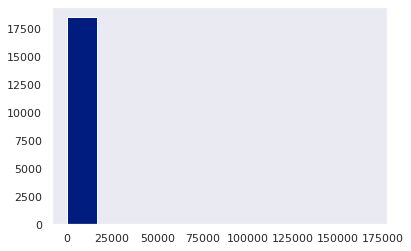

In [31]:
plt.hist(data['Monto'])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

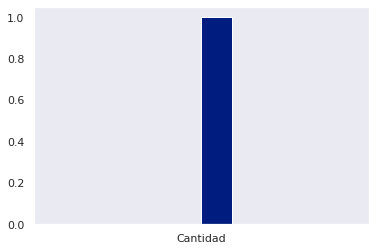

In [32]:
plt.hist('Cantidad')

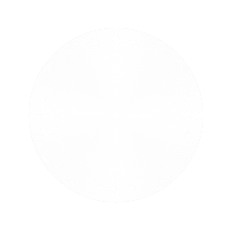

In [42]:
plt.pie(data['Out_kingdom'])
plt.show()

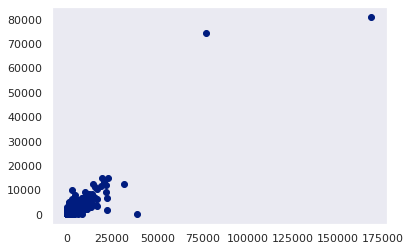

In [36]:
plt.scatter(data['Monto'],data['Cantidad'])

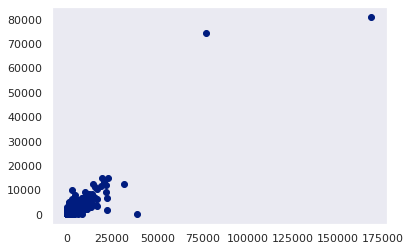

In [44]:
x = data['Monto']
y = data['Cantidad']
plt.scatter(x=x,y=y)

In [14]:
data.head()

,Unnamed: 0,N_factura,ID_Cliente,País,Cantidad,Monto,Fecha,Continente,Mes,Dia,Año,Periodo,Out_kingdom,Volumen_cantidad
0,0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Europa,Marzo,30,2021,2021 03,0,100<=x<=200
1,1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Europa,Noviembre,11,2021,2021 11,0,100<=x<=200
2,3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Europa,Abril,6,2021,2021 04,0,x<50
3,4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Europa,Octubre,27,2021,2021 10,0,300<=x<=400
4,5,576630,13816.0,Germany,91,199.98,2021-11-16 08:38:00,Europa,Noviembre,16,2021,2021 11,1,50<=x<=100


findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


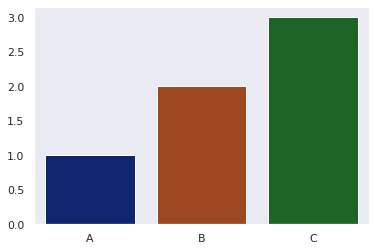

In [21]:
    sns.set(style='dark',palette='dark', font="Verdana",font_scale=1)
    sns.barplot(x=['A','B','C'], y=[1,2,3])
    plt.show()

<AxesSubplot:>

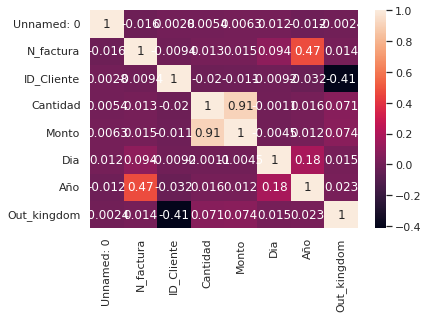

In [26]:
sns.heatmap(data.corr(),annot=True)

In [43]:
### ME DA ESOACIO ENTRE LOS GRAFICOSY SE VE MAS BONITO*
##fig.tight_layout()

In [120]:
dentro_king = data[data['Out_kingdom'] == 0 ]
fuera_king = data[data['Out_kingdom'] == 1 ]

In [122]:
suma_fuera = sum(fuera_king['Monto'])
suma_dentro = sum(dentro_king['Monto'])

In [124]:
print(suma_fuera)
print('--'*20)
print(suma_dentro)

1603016.3500000008
----------------------------------------
7308391.5500000315


In [128]:
mean_fuera = (fuera_king['Monto']).mean()
mean_dentro = (dentro_king['Monto']).mean()

In [129]:
print(mean_fuera)
print('--'*20)
print(mean_dentro)

848.6057967178406
----------------------------------------
438.33692496851387
